
# Importing Libraries

In [52]:

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import sklearn.datasets as dt
from sklearn import datasets
import seaborn as sns
# Needed for generating data from an existing dataset
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.preprocessing import MinMaxScaler,StandardScaler, quantile_transform


## Topic 2 - Normalization of covariates

In [4]:
data = datasets.fetch_california_housing()

In [35]:
x = pd.DataFrame(data.data)
y = data.target
x.columns = data.feature_names
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [32]:
np.random.seed(42)
x = pd.DataFrame(np.random.randn(1000, 8),
                  columns=['a', 'b', 'c', 'd', 'e','f','g','h'])
#y = data.target
#x.columns = data.feature_names
x

,a,b,c,d,e,f,g,h
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435
1,-0.469474,0.542560,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288
2,-1.012831,0.314247,-0.908024,-1.412304,1.465649,-0.225776,0.067528,-1.424748
3,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694,-0.601707,1.852278
4,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861
...,...,...,...,...,...,...,...,...
995,-0.630458,1.637082,-0.780144,0.735269,-0.559164,-0.460307,1.030250,-0.380037
996,-0.404795,1.132805,1.597397,0.644690,-0.654770,-0.510608,0.079915,0.320930
997,-0.987866,0.723038,0.085513,-1.715708,-0.928926,-0.504129,-0.072858,1.889279
998,0.238171,-0.840772,0.220631,-0.352088,0.324758,0.580568,1.209231,-0.024286


## Probablity distribution of covariates.

C:\Users\44743\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\44743\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\44743\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

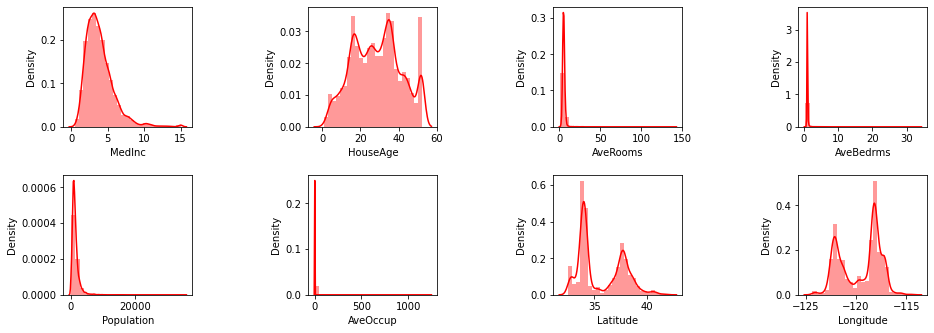

In [36]:
def showdist(x):
    i = 1
    plt.figure(figsize=(15,5))
    plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.9, 
                        hspace=0.4)
    for col in x.columns:
        plt.subplot(2,4,i)
        sns.distplot(x[col], bins=25, color="r")
        i += 1
    plt.show()
showdist(x)

In [37]:
regr = LinearRegression()
regr.fit(x, y)
regr.coef_

array([ 4.36693293e-01,  9.43577803e-03, -1.07322041e-01,  6.45065694e-01,
       -3.97638942e-06, -3.78654265e-03, -4.21314378e-01, -4.34513755e-01])

## Using min max scaler normalization

C:\Users\44743\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\44743\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\44743\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

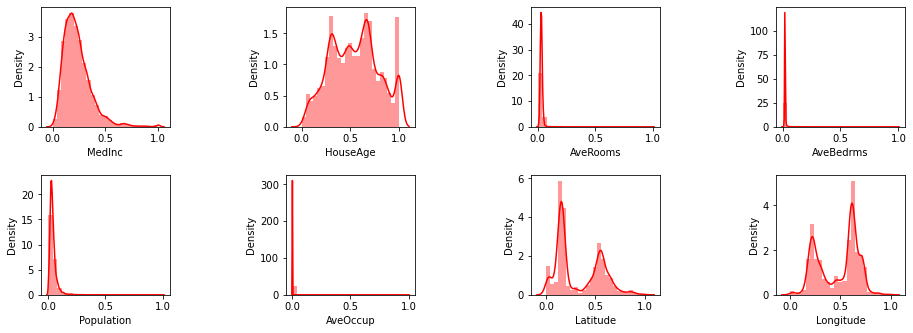

In [30]:
scaling = MinMaxScaler()
minmaxscaled = pd.DataFrame(scaling.fit_transform(x))
minmaxscaled.columns = x.columns
showdist(minmaxscaled)

In [263]:
regr.fit(minmaxscaled, y)
regr.coef_

array([  6.33214009,   0.48122468, -15.13916237,  21.76021606,
        -0.1418736 ,  -4.70531325,  -3.96456829,  -4.3625181 ])

## Using Standardisation

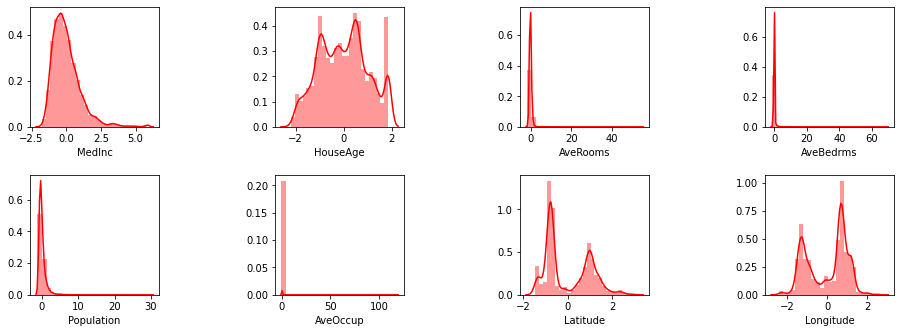

In [264]:
scaling = StandardScaler()
stdx = pd.DataFrame(scaling.fit_transform(x))
stdx.columns = x.columns
showdist(stdx)

In [265]:
regr.fit(stdx, y)
regr.coef_

array([ 0.8296193 ,  0.11875165, -0.26552688,  0.30569623, -0.004503  ,
       -0.03932627, -0.89988565, -0.870541  ])

## Using quantile based transformation

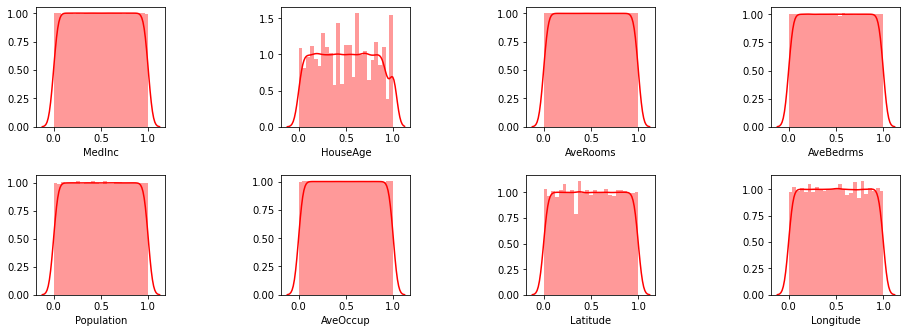

array([ 2.59156563,  0.55895337, -0.16698351,  0.37516511,  0.16434156,
       -0.91418026, -2.32394632, -2.16038558])

In [266]:
quantx = pd.DataFrame(quantile_transform(x))
quantx.columns = x.columns
showdist(quantx)
regr.fit(quantx, y)
regr.coef_